# AST4310 project 2
Authored by xxx and xxx

In [1]:
%%javascript  # Allow equation numbers
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from astropy import units
from astropy import constants
from astropy.visualization import quantity_support
from matplotlib_inline.backend_inline import set_matplotlib_formats

from astropy.modeling.models import BlackBody
from cycler import cycler
from matplotlib import cm

quantity_support()
set_matplotlib_formats('svg')
plt.rc('figure', figsize=(10,10/1.3))
plt.rc('font', size=16)
plt.rc('legend', frameon=False)

### Exercise 1: The Planck Law and radiation through an isothermal layer


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Plot the Planck function $B_\lambda$ for 100 $< \lambda <$ 2000 nm for a range of temperatures (5000 to 8000 K). Use a log scale for both the x and y axes. Explain the slopes of the righthand part.

* Use equation (5) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:


``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```

* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$? (Hint: use a log scale in the x and y axes to study the behavior at small $\tau$.)  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
 
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?
    

</div>

The Planck function is defined as 
\begin{equation}
   B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1}
  \tag{1}
\end{equation}
Using the ```astropy.modeling.models``` package we can plot the Planck function using the ```BlackBody``` model.

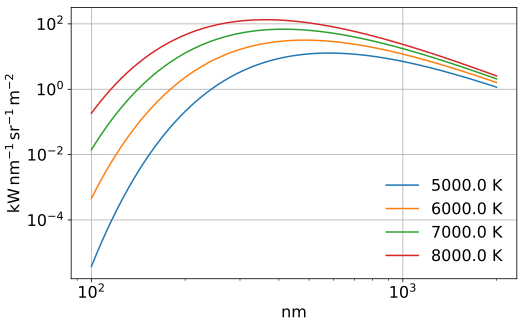

In [14]:
si_units = units.Quantity(1, unit='kW m-2 sr-1 nm-1') # SI unit
temp = numpy.linspace(5000, 8000, 4)*units.K # create temperature array to plot over
fig, ax = plt.subplots(figsize=(8,5)) # make figure
wave = numpy.linspace(100,2000,1000) * units.nm # wavelength array
for tempi in temp:
    bb = BlackBody(tempi, scale=si_units)
    intensity = bb(wave)
    ax.plot(wave, intensity, label='%s'%tempi)

plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')


The righthand part of the slope can be explained by ...

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
   
* Use equation (5) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:

``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```
</div>

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
   
* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$? (Hint: use a log scale in the x and y axes to study the behavior at small $\tau$.)  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
</div>

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
 
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?
</div>

### Exercise 2: Spectral lines from a solar reversing layer

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model for a reference wavelength of 500 nm, writing code for this purpose. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

* Study line profiles with different $\tau_0$, using `tau0 = 10 ** numpy.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin and optically thick, at line center? And at $u=5$?

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center, $I_{u=0}$? Check these values by computing them directly. What happens to these values at other wavelengths?  

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

</div>

### Exercise 3: The curve of growth

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Using the code from Exercise 2, compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.  

* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)
    
</div>